In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Check the count of rows and columns
df.shape

(1025, 14)

In [5]:
# Check the whther the data is imbalanced or not 
# Target column is our O/p column
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

#### For the above we can say the dataset is not imbalanced 

In [6]:
# Check the null values present in the data set
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### from above we can say that the no null values present

In [7]:
# Check the duplicate values
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df.shape

(1025, 14)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(302, 14)

#### from above 164 rows was duplicate we just eliminate that row

In [11]:
# Check the data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
corr_mat=df.corr()

In [14]:
# get the triangle 
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df,2))

Top Absolute Correlations
cp       target    0.432080
thalach  target    0.419955
dtype: float64


#### As per above we can say that the CP and thalach are the highly corrrelated with target columns

## EDA 

#### Lets check the distribution

In [15]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


#### Age Distribution and relation with target

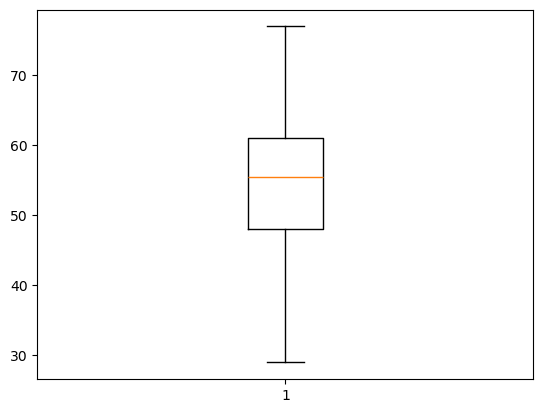

In [16]:
plt.boxplot(df['age'])
plt.show()

In [17]:
import seaborn as sns

In [18]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

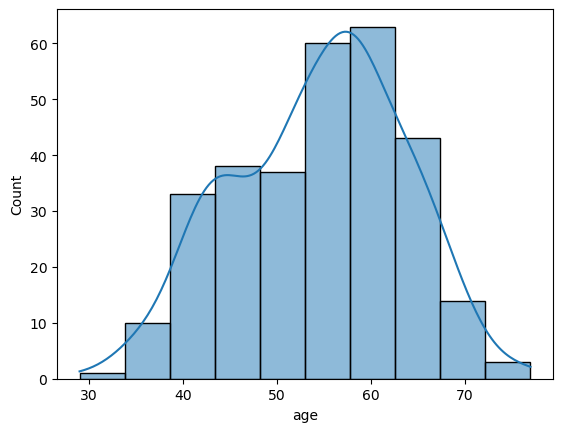

In [19]:
sns.histplot(df['age'],kde=True,bins=10)

#### As per the above visualization we can say this is a little bit left skewed

In [20]:
# check with target column
# in my opinion pie is good for visualization
df['age_group']= pd.cut(df['age'],bins=[20,30,40,50,60,70,80,90,100],labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80+'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        302 non-null    int64   
 1   sex        302 non-null    int64   
 2   cp         302 non-null    int64   
 3   trestbps   302 non-null    int64   
 4   chol       302 non-null    int64   
 5   fbs        302 non-null    int64   
 6   restecg    302 non-null    int64   
 7   thalach    302 non-null    int64   
 8   exang      302 non-null    int64   
 9   oldpeak    302 non-null    float64 
 10  slope      302 non-null    int64   
 11  ca         302 non-null    int64   
 12  thal       302 non-null    int64   
 13  target     302 non-null    int64   
 14  age_group  302 non-null    category
dtypes: category(1), float64(1), int64(13)
memory usage: 36.0 KB


<AxesSubplot:>

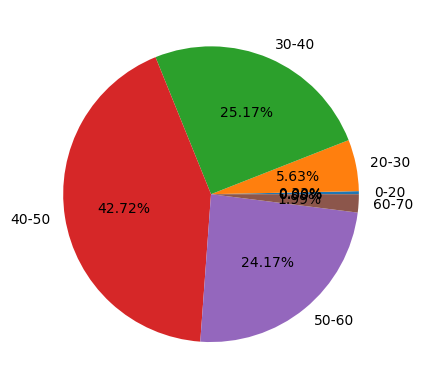

In [108]:
df.groupby('age_group').size().plot(kind='pie', autopct='%1.2f%%')

<AxesSubplot:xlabel='age_group', ylabel='count'>

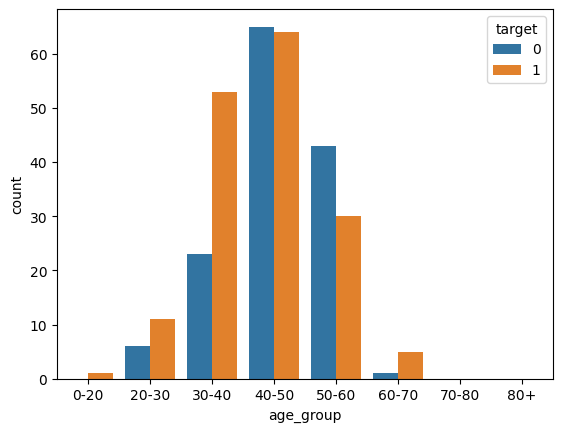

In [109]:
sns.countplot(x='age_group',data=df,hue='target')

##### As per the above we can say that the age group of 30-40,40-50 person are getting high heart attacks

### Check the target column with sex

In [110]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

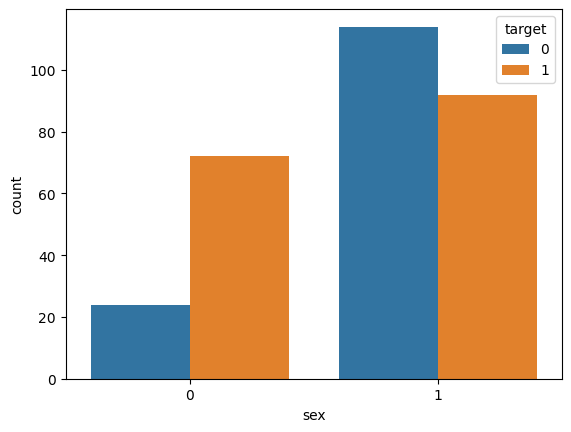

In [111]:
sns.countplot(x=df['sex'],data=df,hue='target')

##### as per above diagram we can say that the males are getting more attacks than the female

### Check target columns with CP

In [112]:
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

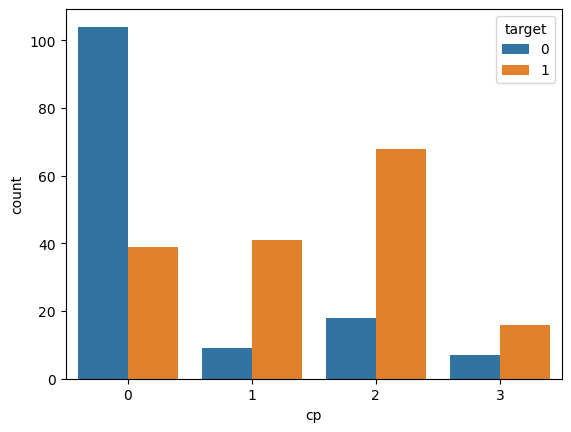

In [113]:
sns.countplot(x='cp',hue='target',data=df)

##### from the above we can say that the cp-2 category have the highest heart attack

### check tha target col with thalach

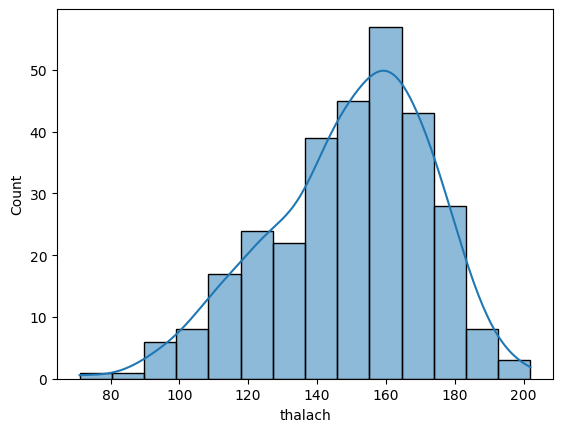

In [114]:
sns.histplot(df['thalach'],kde= True)
plt.show()

<AxesSubplot:ylabel='thalach'>

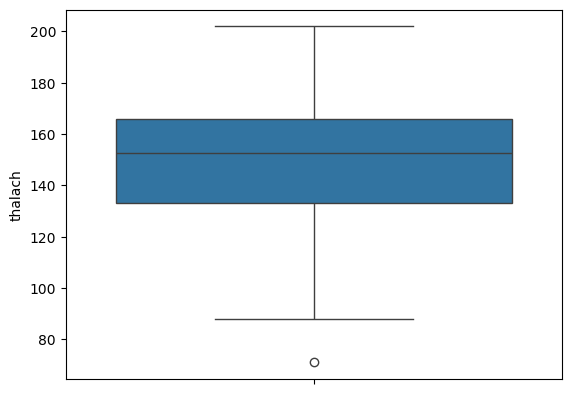

In [115]:
sns.boxplot(df['thalach'])

<AxesSubplot:xlabel='thalach', ylabel='Count'>

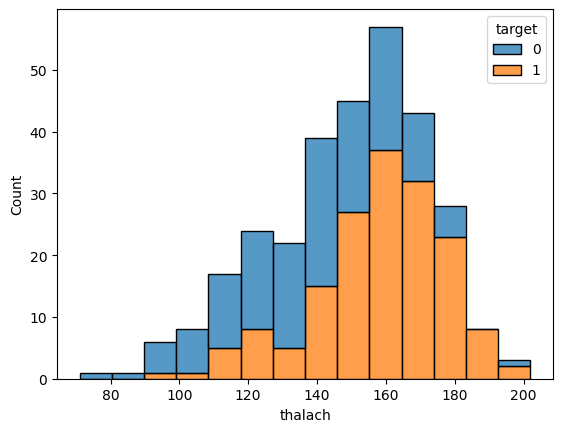

In [116]:
sns.histplot(x='thalach',hue='target',data=df,multiple="stack")

##### As per above we can say that if the patient have the thalach between 140-180 have more chnaces to get the heart attacks

### Check the target column with chol

<AxesSubplot:xlabel='chol', ylabel='Count'>

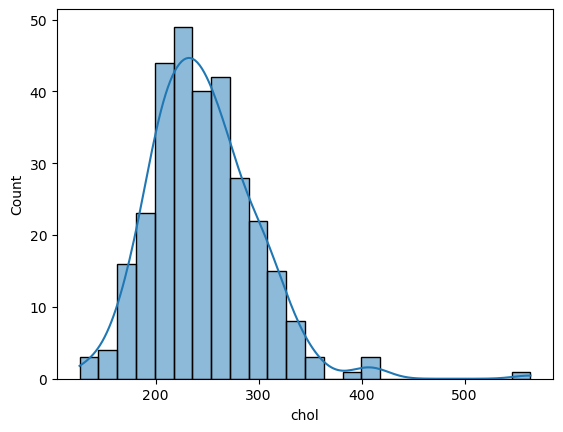

In [117]:
sns.histplot(df['chol'],kde=True)

<AxesSubplot:>

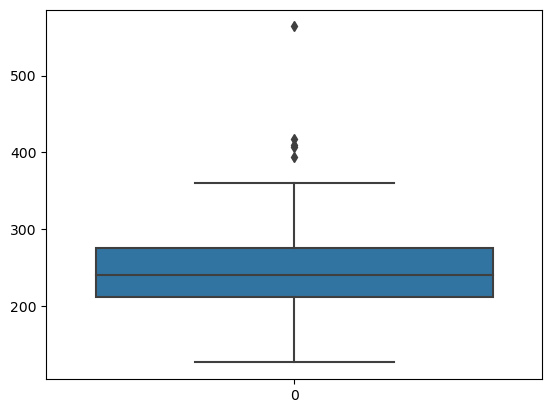

In [24]:
sns.boxplot(df['chol'])

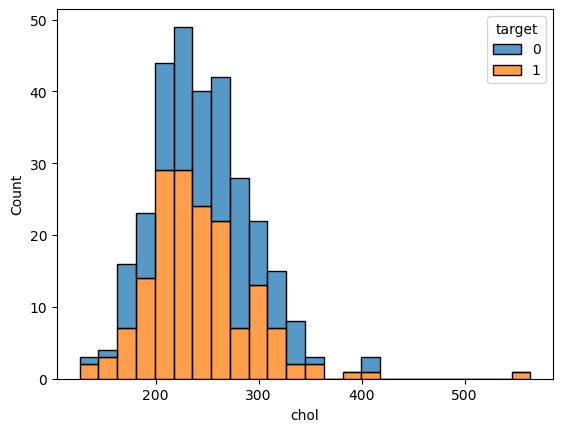

In [119]:
sns.histplot(x='chol',hue='target',data=df,multiple='stack')
plt.show()

##### as per above we can say that the person have the chol between 180-260, 300 also, they have high chnaces to get the heart attack 

### Check target cols with trestbps

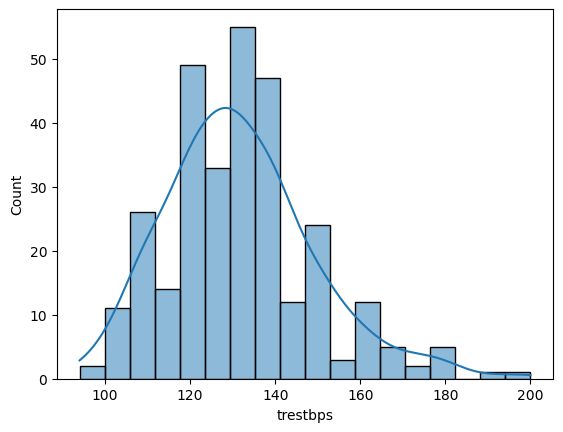

In [120]:
sns.histplot(df['trestbps'],kde=True)
plt.show()

<AxesSubplot:ylabel='trestbps'>

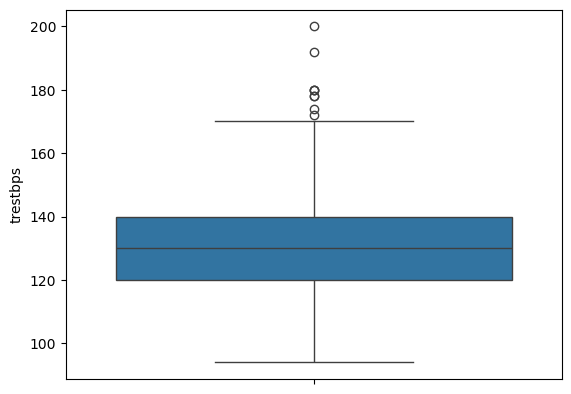

In [121]:
sns.boxplot(df['trestbps'])

#### we can't consider this as outlier because person can have the 200 trestbps

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

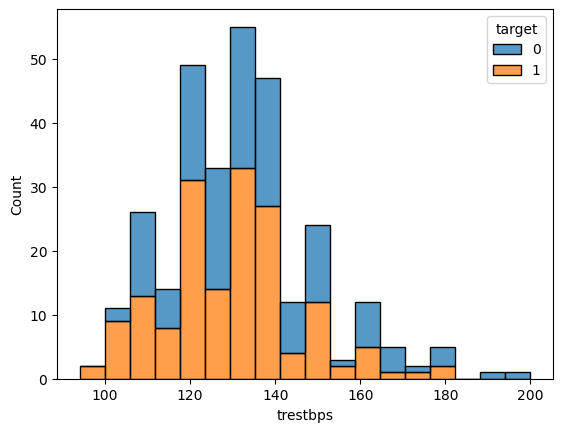

In [122]:
sns.histplot(x='trestbps',hue='target',data=df,multiple='stack')

##### As per above we can say the person have trestbps between 100-140 have high chnaces for heart attack 

### Feature Engeneering Data Processing

In [25]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [32]:
df=df.drop(columns=['age_group'])

In [27]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [28]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

##### I dicided to go with standardization for skwed data set for high valued data set

In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df_copy=df.copy()

In [24]:
type(df_copy)

pandas.core.frame.DataFrame

In [25]:
df_copy.shape

(302, 15)

In [26]:
df_copy.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,40-50
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,40-50


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [28]:
stdsclr=StandardScaler()
norm=Normalizer()
mm=MinMaxScaler()

In [29]:
cols=['age','trestbps','chol','thalach']
df[cols]=stdsclr.fit_transform(df[['age','trestbps','chol','thalach']])

In [30]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,1.0,2,2,3,0,40-50
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,3.1,0,0,3,0,40-50


In [36]:
df.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

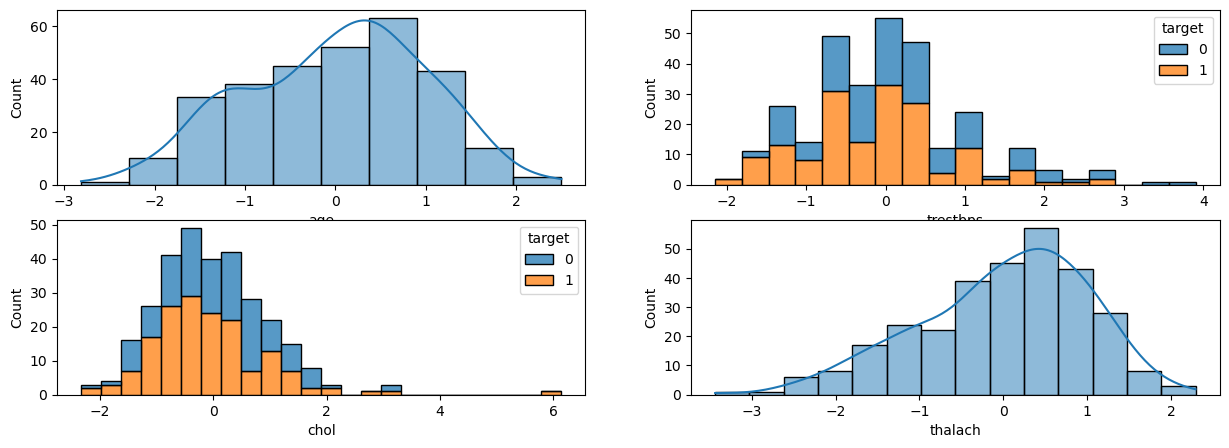

In [38]:
fig,ax=plt.subplots(2,2,figsize=(15,5))
sns.histplot(df['age'],kde=True,bins=10,ax=ax[0,0])
sns.histplot(x='trestbps',hue='target',data=df,multiple='stack',ax=ax[0,1])
sns.histplot(x='chol',hue='target',data=df,multiple='stack',ax=ax[1,0])
sns.histplot(df['thalach'],kde= True,ax=ax[1,1])
plt.show()

In [39]:
df['oldpeak']=stdsclr.fit_transform(df[['oldpeak']])

In [40]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0


<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

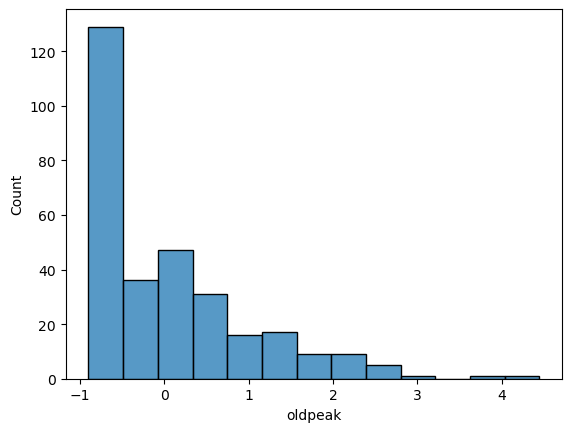

In [41]:
sns.histplot(df['oldpeak'])

<AxesSubplot:>

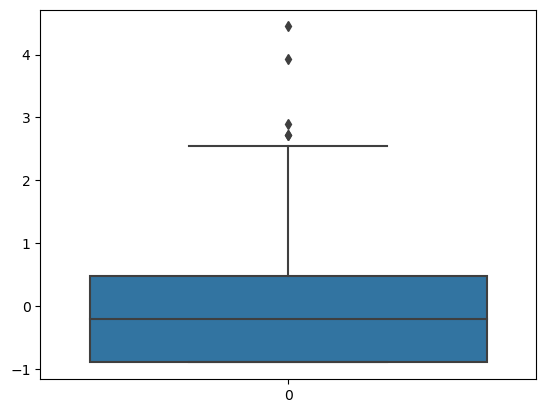

In [42]:
sns.boxplot(df['oldpeak'])

# Split the data set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=df.drop(columns='target')
y=df['target']

In [45]:
X.shape

(302, 13)

In [46]:
y.shape

(302,)

In [47]:
X_trian,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

### Model Training

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty= 'l2', solver= 'liblinear')

In [49]:
log_param={
    "penalty":['l1','l2', 'elasticnet'],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
lr_grd=GridSearchCV(lr,param_grid=log_param)

In [52]:
lr_grd.fit(X_trian,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.81085271        nan        nan        nan 0.796567
 0.796567   0.79667774 0.796567          nan 0.796567   0.796567
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [53]:
lr_grd.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [54]:
lr.fit(X_trian,y_train)

LogisticRegression(solver='liblinear')

In [55]:
from sklearn.metrics import accuracy_score,precision_score

In [56]:
lr.score(X_trian,y_train)

0.8483412322274881

In [57]:
accuracy_score(y_test,lr.predict(X_test))

0.8351648351648352

In [58]:
precision_score(y_test,lr.predict(X_test))

0.8545454545454545

##### 90% is correctly classified

In [59]:
result=pd.DataFrame(columns=['Model','Score'])

In [60]:
result

,Model,Score


In [61]:
result=result.drop_duplicates(inplace=True)

In [62]:
result=result.append({'Model':'Logistic regression','Score':0.8021978021978022*100},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11236\1767283402.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'Logistic regression','Score':0.8021978021978022*100},ignore_index=True)


In [63]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

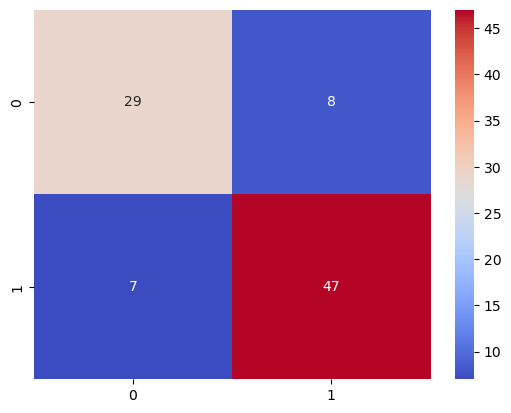

In [64]:
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)),annot=True, cmap='coolwarm')

<AxesSubplot:>

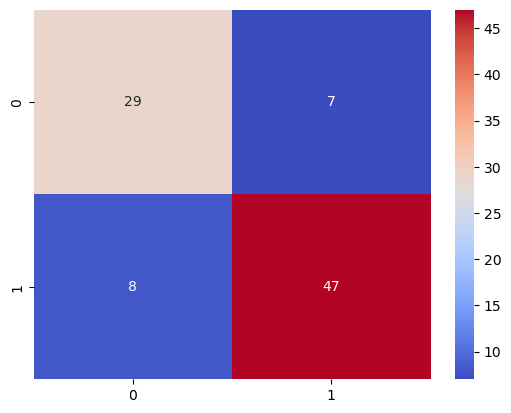

In [65]:
sns.heatmap(confusion_matrix(lr.predict(X_test),y_test),annot=True, cmap='coolwarm')

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.85      0.87      0.86        54

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



## Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'entropy', n_estimators= 100)

In [69]:
rfc_param={
    'n_estimators':[20,40,50,60,100],
    'criterion': ['gini','entropy','log_loss'],
}

In [70]:
rfc_grd=GridSearchCV(rfc,param_grid=rfc_param)

In [71]:
rfc_grd.fit(X_trian,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "C:\Users\

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=60),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [20, 40, 50, 60, 100]})

In [72]:
rfc_grd.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [74]:
rfc.fit(X_trian,y_train)

RandomForestClassifier(criterion='entropy')

In [75]:
rfc.score(X_trian,y_train)

1.0

In [76]:
accuracy_score(y_test,rfc.predict(X_test),)

0.8351648351648352

In [77]:
result=result.append({'Model':'Random FC','Score':0.8461538461538461*100},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11236\53306885.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'Random FC','Score':0.8461538461538461*100},ignore_index=True)


In [78]:
result

,Model,Score
0,Logistic regression,80.219780
1,Random FC,84.615385


In [79]:
precision_score(y_test,rfc.predict(X_test),)

0.8679245283018868

In [80]:
confusion_matrix(rfc.predict(X_test),y_test)

array([[30,  8],
       [ 7, 46]], dtype=int64)

### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric= 'minkowski', n_neighbors= 5, weights= 'uniform')

In [82]:
knn_param={
    'metric':['manhattan','minkowski'],
    'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15],
    'weights':['uniform','distance']
}

In [83]:
knn_grd=GridSearchCV(knn,param_grid=knn_param)

In [84]:
knn_grd.fit(X_trian,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'weights': ['uniform', 'distance']})

In [85]:
knn_grd.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

In [86]:
knn.fit(X_trian,y_train)

KNeighborsClassifier()

In [87]:
knn.score(X_trian,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8720379146919431

In [88]:
accuracy_score(knn.predict(X_test),y_test)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7582417582417582

In [89]:
precision_score(knn.predict(X_test),y_test)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7962962962962963

In [90]:
confusion_matrix(y_test,knn.predict(X_test))

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[26, 11],
       [11, 43]], dtype=int64)

In [91]:
result=result.append({'Model':'KNNC','Score':0.8901098901098901*100},ignore_index=True)
result

C:\Users\User\AppData\Local\Temp\ipykernel_11236\1845122581.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'KNNC','Score':0.8901098901098901*100},ignore_index=True)


,Model,Score
0,Logistic regression,80.219780
1,Random FC,84.615385
2,KNNC,89.010989


### SVC

In [92]:
from sklearn.svm import SVC
svc=SVC(gamma='auto', kernel= 'sigmoid')

In [93]:
svc_param={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [94]:
svc_grd=GridSearchCV(svc,param_grid=svc_param)

In [95]:
svc_grd.fit(X_trian,y_train)

GridSearchCV(estimator=SVC(gamma='auto', kernel='sigmoid'),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [96]:
svc_grd.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [97]:
svc.fit(X_trian,y_train)

SVC(gamma='auto', kernel='sigmoid')

In [98]:
svc.score(X_trian,y_train)

0.7914691943127962

In [99]:
accuracy_score(y_test,svc.predict(X_test))

0.8351648351648352

In [100]:
precision_score(y_test,svc.predict(X_test))

0.8421052631578947

In [101]:
confusion_matrix(y_test,svc.predict(X_test))

array([[28,  9],
       [ 6, 48]], dtype=int64)

In [102]:
result=result.append({'Model':'SVC','Score':0.8461538461538461*100},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11236\1915561887.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'SVC','Score':0.8461538461538461*100},ignore_index=True)


In [103]:
result

,Model,Score
0,Logistic regression,80.219780
1,Random FC,84.615385
2,KNNC,89.010989
3,SVC,84.615385


### DT

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion= 'entropy', splitter='random')

In [105]:
dtc_param={
    'criterion': ['gini','entropy','log_loss'],
    'splitter':['best', 'random']
}

In [106]:
dtc_grd=GridSearchCV(dtc,param_grid=dtc_param)

In [107]:
dtc_grd.fit(X_trian,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_me

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [108]:
dtc_grd.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [109]:
dtc.fit(X_trian,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [110]:
dtc.score(X_trian,y_train)

1.0

In [111]:
accuracy_score(dtc.predict(X_test),y_test)

0.7582417582417582

In [112]:
precision_score(y_test,dtc.predict(X_test))

0.82

In [113]:
confusion_matrix(y_test,dtc.predict(X_test))

array([[28,  9],
       [13, 41]], dtype=int64)

In [114]:
result=result.append({'Model':'Decission Tree','Score':0.7362637362637363*100},ignore_index=True)
result

C:\Users\User\AppData\Local\Temp\ipykernel_11236\3554296112.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'Model':'Decission Tree','Score':0.7362637362637363*100},ignore_index=True)


,Model,Score
0,Logistic regression,80.219780
1,Random FC,84.615385
2,KNNC,89.010989
3,SVC,84.615385
4,Decission Tree,73.626374


### From Above we can say that the KNNC is good for this data set

In [115]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0


#### Tesing of the model

In [123]:
rfc.predict([[45,1,2,145,700,1,0,400,0,3.0,1,0,0]])

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [124]:
knn.predict([[45,1,2,145,000,1,0,799,0,3.0,0,0,0]])

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)

# Export the Model 

In [118]:
import pickle

In [119]:
pickle.dump(stdsclr,open('scaler.pkl','wb'))
pickle.dump(rfc,open('rfc.pkl','wb'))

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 43.5 KB


In [121]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0


In [122]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [223]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)